In [121]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/local/chromium-browser/chromedriver /usr/local/bin


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 256 kB in 2s (145 kB/s)
Reading package lists... Done
Reading package lists... Done
B

In [122]:
import sys
sys.path.insert(0,'/usr/local/bin/chromedriver')

In [123]:
from selenium import webdriver

In [124]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')





In [125]:
driver = webdriver.Chrome('chromedriver',options=chrome_options)




In [126]:
import pandas as pd 

In [127]:
import time

In [128]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [129]:
import numpy as np


In [130]:
#We will iterate through each of the necessary pages and scrape information on the player's n
#Name
#Position
#Price
#Overall

links = ["https://www.muthead.com/21/players/?page=1","https://www.muthead.com/21/players/?page=2","https://www.muthead.com/21/players/?page=3","https://www.muthead.com/21/players/?page=4"]


namesArr = []
overallsArr = []
pricesArr = []
posArr = []


for link in links:
  driver.get(link)
  names = driver.find_elements_by_css_selector('.list-info-player__player-name')
  overalls = driver.find_elements_by_css_selector('.list-info-player__ovr-value--elite')
  prices = driver.find_elements_by_css_selector('.player-listing__price-value')
  positions = driver.find_elements_by_css_selector('.list-info-player__player-info')
  for name in names:
    namesArr.append(name.text)
  for overall in overalls:
    overallsArr.append(overall.text)
  for price in prices:
    pricesArr.append(price.text)
  for pos in positions:
    posArr.append(pos.text)


    
#Create a dictionary to store data
playerDict = {"NAME":namesArr, "OVERALL":overallsArr, "PRICE":pricesArr, "POS":posArr}

playerData = pd.DataFrame.from_dict(playerDict)

   

    

In [131]:
#Here is our raw scraped data
pd.set_option("display.max_rows", 80)

playerData

,NAME,OVERALL,PRICE,POS
0,Barry Sanders,93,1.1M,HB | Team Diamonds
1,Bo Jackson,91,844K,HB | Legends
2,Junior Seau,91,683K,MLB | Legends
3,Tony Gonzalez,91,475K,TE | Legends
4,John Lynch,91,445K,SS | Legends
5,Reggie Wayne,91,612K,WR | Legends
6,Lawrence Taylor,91,834K,ROLB | Legends
7,Bo Jackson,90,402K,HB | Legends
8,Junior Seau,90,290K,MLB | Legends
9,Brandin Cooks,90,2.3M,WR | Ultimate Kickoff


In [132]:
#Add a new RANK and POSITION column to store the values of the ranking and position of each player respectively
playerData['RANK'] = pd.Series()
playerData['POSITION'] = pd.Series()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [140]:
#Here we will iterate through the positions column and add the positions to the necessary column
i = 0
while i < len(playerData.POS):
  if playerData.POS[i].startswith('HB'):
    playerData.POSITION[i] = 'HB'
  elif playerData.POS[i].startswith('QB'):
    playerData.POSITION[i] = 'QB'
  elif playerData.POS[i].startswith('SS'):
    playerData.POSITION[i] = 'SS'
  elif playerData.POS[i].startswith('RG'):
    playerData.POSITION[i] = 'RG'
  elif playerData.POS[i].startswith('DT'):
    playerData.POSITION[i] = 'DT'
  elif playerData.POS[i].startswith('RE'):
    playerData.POSITION[i] = 'RE'
  elif playerData.POS[i].startswith('MLB'):
    playerData.POSITION[i] = 'MLB'
  elif playerData.POS[i].startswith('ROLB'):
    playerData.POSITION[i] = 'ROLB'
  elif playerData.POS[i].startswith('LOLB'):
    playerData.POSITION[i] = 'LOLB'
  elif playerData.POS[i].startswith('WR'):
    playerData.POSITION[i] = 'WR'
  elif playerData.POS[i].startswith('FS'):
    playerData.POSITION[i] = 'FS'
  elif playerData.POS[i].startswith('RT'):
    playerData.POSITION[i] = 'RT'
  elif playerData.POS[i].startswith('C'):
    playerData.POSITION[i] = 'C'
  elif playerData.POS[i].startswith('LT'):
    playerData.POSITION[i] = 'LT'
  elif playerData.POS[i].startswith('LG'):
    playerData.POSITION[i] = 'LG'
  elif playerData.POS[i].startswith('TE'):
    playerData.POSITION[i] = 'TE'
  elif playerData.POS[i].startswith('K'):
    playerData.POSITION[i] = 'K'
  i = i+1





In [141]:
#Here we will iterate through the same column to get the rankings we want
i = 0
while i < len(playerData.POS):
  if playerData.POS[i].endswith('Team Diamonds'):
    playerData.RANK[i] = 'Team Diamonds'
  elif playerData.POS[i].endswith('Legends'):
    playerData.RANK[i] = 'Legends'
  elif playerData.POS[i].endswith('Ultimate Kickoff'):
    playerData.RANK[i] = 'Ultimate Kickoff'
  elif playerData.POS[i].endswith('Limited Edition'):
    playerData.RANK[i] = 'Limited Edition'
  elif playerData.POS[i].endswith('Team of the Week'):
    playerData.RANK[i] = 'Team of the Week'
  elif playerData.POS[i].endswith('Heavyweights'):
    playerData.RANK[i] = 'Heavyweights'
  elif playerData.POS[i].endswith('Superstar MVPs'):
    playerData.RANK[i] = 'Superstar MVPs'
  elif playerData.POS[i].endswith('Core Elite'):
    playerData.RANK[i] = 'Core Elite'
  elif playerData.POS[i].endswith('Master'):
    playerData.RANK[i] = 'Master'
  i = i + 1


In [142]:
#our two new columns are created with the necesary values
playerData

,NAME,OVERALL,PRICE,POS,RANK,POSITION
0,Barry Sanders,93,1100000,HB | Team Diamonds,Team Diamonds,HB
1,Bo Jackson,91,844K,HB | Legends,Legends,HB
2,Junior Seau,91,683K,MLB | Legends,Legends,MLB
3,Tony Gonzalez,91,475K,TE | Legends,Legends,TE
4,John Lynch,91,445K,SS | Legends,Legends,SS
5,Reggie Wayne,91,612K,WR | Legends,Legends,WR
6,Lawrence Taylor,91,834K,ROLB | Legends,Legends,ROLB
7,Bo Jackson,90,402K,HB | Legends,Legends,HB
8,Junior Seau,90,290K,MLB | Legends,Legends,MLB
9,Brandin Cooks,90,2300000,WR | Ultimate Kickoff,Ultimate Kickoff,WR


In [225]:
#Now we need to edit the prices to get them in the way we want
#Edit each M to make it a string
i = 0
while i < len(playerData.PRICE):
  if playerData.PRICE[i] == '1.1M':
    playerData.PRICE[i] = '1100000'
  elif playerData.PRICE[i] == '2.3M':
    playerData.PRICE[i] = '2300000'
  elif playerData.PRICE[i] == '1.2M':
    playerData.PRICE[i] = '1200000'
  elif playerData.PRICE[i] == '1.3M':
    playerData.PRICE[i] = '1300000'
  elif playerData.PRICE[i] == '86.1K':
    playerData.PRICE[i] = '86100'
  i = i + 1
 



  
  

In [149]:
playerData.pop('POS')

0          HB | Team Diamonds
1                HB | Legends
2               MLB | Legends
3                TE | Legends
4                SS | Legends
5                WR | Legends
6              ROLB | Legends
7                HB | Legends
8               MLB | Legends
9       WR | Ultimate Kickoff
10      CB | Ultimate Kickoff
11               TE | Legends
12               SS | Legends
13    LOLB | Team of the Week
14       QB | Limited Edition
15       CB | Limited Edition
16      SS | Ultimate Kickoff
17               WR | Legends
18             ROLB | Legends
19               RE | Legends
20               QB | Legends
21               FS | Legends
22               RG | Legends
23               CB | Legends
24                K | Legends
25        HB | Superstar MVPs
26        RE | Superstar MVPs
27        WR | Superstar MVPs
28         TE | Team Diamonds
29         RG | Team Diamonds
30         RT | Team Diamonds
31         CB | Team Diamonds
32         RE | Team Diamonds
33        

In [157]:
#Find each price with K and add the neccesary zeroes
i = 0
while i < len(playerData.PRICE):
  if playerData.PRICE[i].endswith('K'):
    playerData.PRICE[i] = playerData.PRICE[i].replace('K', '000')
  i = i + 1



In [159]:
playerData.PRICE.astype(dtype='int64')

0     1100000
1      844000
2      683000
3      475000
4      445000
5      612000
6      834000
7      402000
8      290000
9     2300000
10     316000
11     280000
12     280000
13     860000
14     722000
15    1200000
16    1300000
17     532000
18     744000
19     248000
20     271000
21     191000
22     211000
23     295000
24     223000
25     215000
26     250000
27    1200000
28     291000
29     190000
30     193000
31     276000
32     189000
33     215000
34     187000
35     199000
36     186000
37     240000
38     191000
39     182000
40     220000
41     194000
42     161000
43     160000
44     184000
45     267000
46     174000
47     264000
48     725000
49     160000
50     165000
51     165000
52     163000
53     161000
54     171000
55     126000
56     165000
57     136000
58     139000
59     155000
60     140000
61     221000
62     126000
63     129000
64     129000
65     121000
66     134000
67     178000
68     121000
69     141000
70     145000
71    

In [162]:
playerData.OVERALL.astype(dtype='int64')

0     93
1     91
2     91
3     91
4     91
5     91
6     91
7     90
8     90
9     90
10    90
11    90
12    90
13    90
14    90
15    90
16    90
17    90
18    90
19    90
20    90
21    89
22    89
23    89
24    89
25    89
26    89
27    89
28    89
29    89
30    89
31    89
32    89
33    89
34    89
35    89
36    89
37    89
38    89
39    89
40    89
41    89
42    89
43    89
44    89
45    89
46    89
47    89
48    89
49    89
50    89
51    89
52    89
53    89
54    88
55    88
56    88
57    88
58    88
59    88
60    88
61    88
62    88
63    88
64    88
65    88
66    88
67    88
68    88
69    88
70    88
71    88
72    88
73    88
74    88
75    88
76    88
77    88
78    87
79    87
Name: OVERALL, dtype: int64

In [163]:
#Our prices are now in int64s

playerData



,NAME,OVERALL,PRICE,RANK,POSITION
0,Barry Sanders,93,1100000,Team Diamonds,HB
1,Bo Jackson,91,844000,Legends,HB
2,Junior Seau,91,683000,Legends,MLB
3,Tony Gonzalez,91,475000,Legends,TE
4,John Lynch,91,445000,Legends,SS
5,Reggie Wayne,91,612000,Legends,WR
6,Lawrence Taylor,91,834000,Legends,ROLB
7,Bo Jackson,90,402000,Legends,HB
8,Junior Seau,90,290000,Legends,MLB
9,Brandin Cooks,90,2300000,Ultimate Kickoff,WR


In [183]:
#Reverse the order of the dataset
playerData = playerData[::-1]


#new dataset shows players from least to greatest by overall

In [188]:
playerData

#Our final DataSet scraped from madden

#Time for some EDA!

,NAME,OVERALL,PRICE,RANK,POSITION
79,Isaiah Simmons,87,331000,Master,SS
78,Larry Allen,87,86100,Legends,RG
77,Dan Marino,88,124000,Legends,QB
76,Richard Seymour,88,124000,Legends,DT
75,Aaron Donald,88,205000,Core Elite,RE
74,Stephon Gilmore,88,198000,Core Elite,C
73,Bobby Wagner,88,159000,Core Elite,MLB
72,Lawrence Taylor,88,493000,Legends,ROLB
71,Reggie Wayne,88,321000,Legends,WR
70,Zack Martin,88,145000,Core Elite,RG


89    33
88    24
90    14
91     6
87     2
93     1
Name: OVERALL, dtype: int64

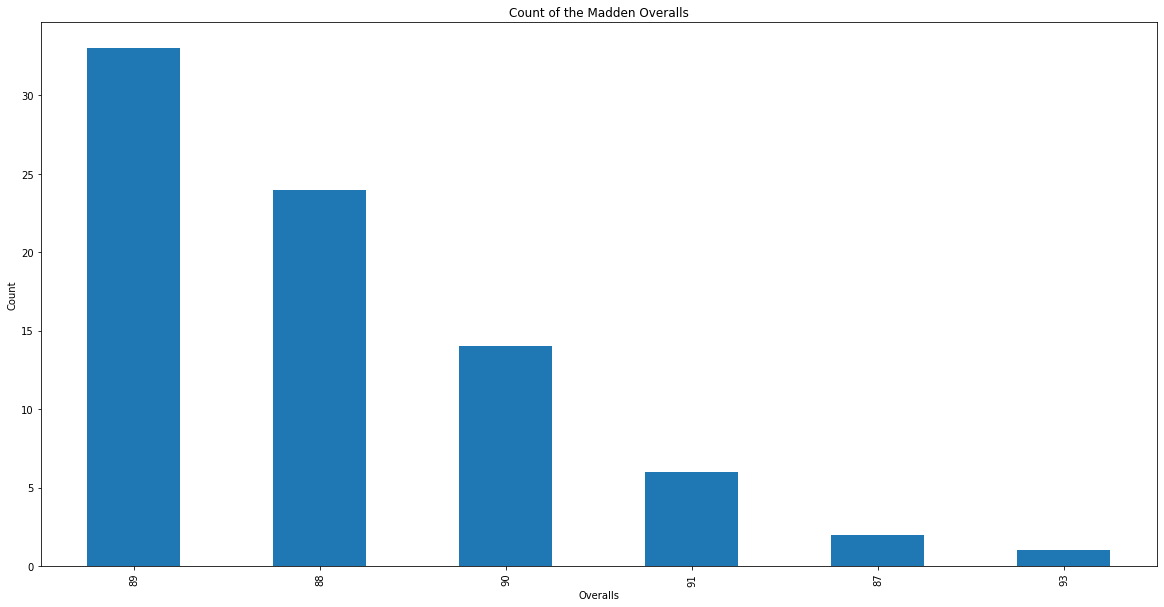

In [221]:
import matplotlib.pyplot as plt


#Lets look at the counts of varios different attributes of players in the game]



playerData['OVERALL'].value_counts().plot(kind='bar', figsize=(20,10))

plt.xlabel('Overalls')
plt.ylabel('Count')
plt.title('Count of the Madden Overalls')


print()
print()


playerData['OVERALL'].value_counts()







#Looks like thers a high volume of players ranked below 90 overalls

(array([ 2., 24., 33., 14.,  7.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

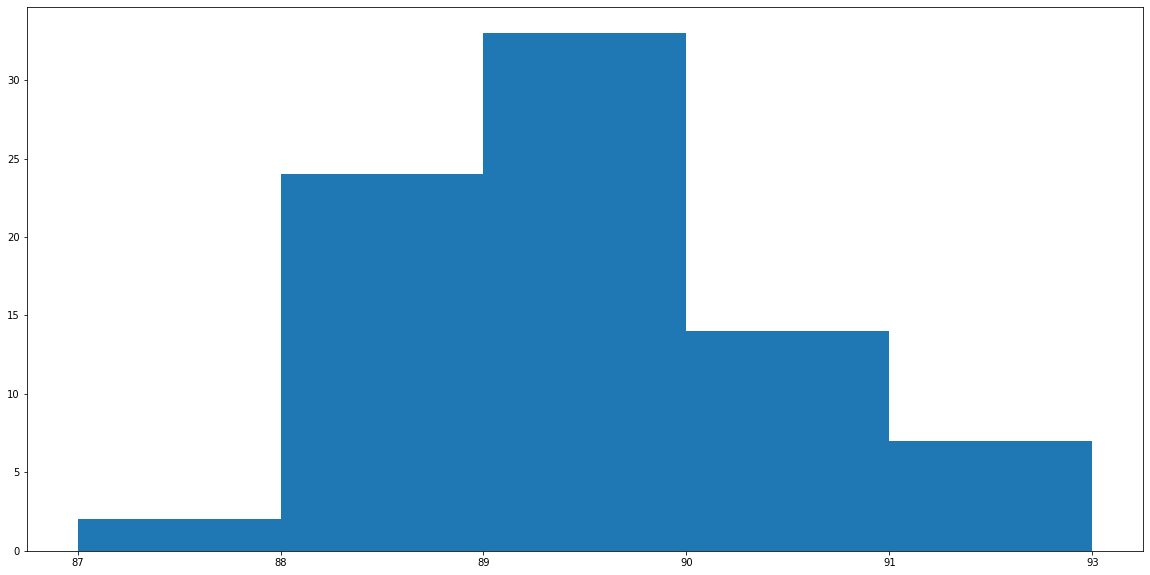

In [205]:
plt.figure(figsize=(20,10))
plt.hist(playerData.OVERALL, bins=5)


#looks like the the player overalls are approximately normal, with a mean of around 89 overall for most players

Legends             32
Team Diamonds       16
Ultimate Kickoff     7
Core Elite           7
Superstar MVPs       6
Heavyweights         5
Team of the Week     4
Limited Edition      2
Master               1
Name: RANK, dtype: int64

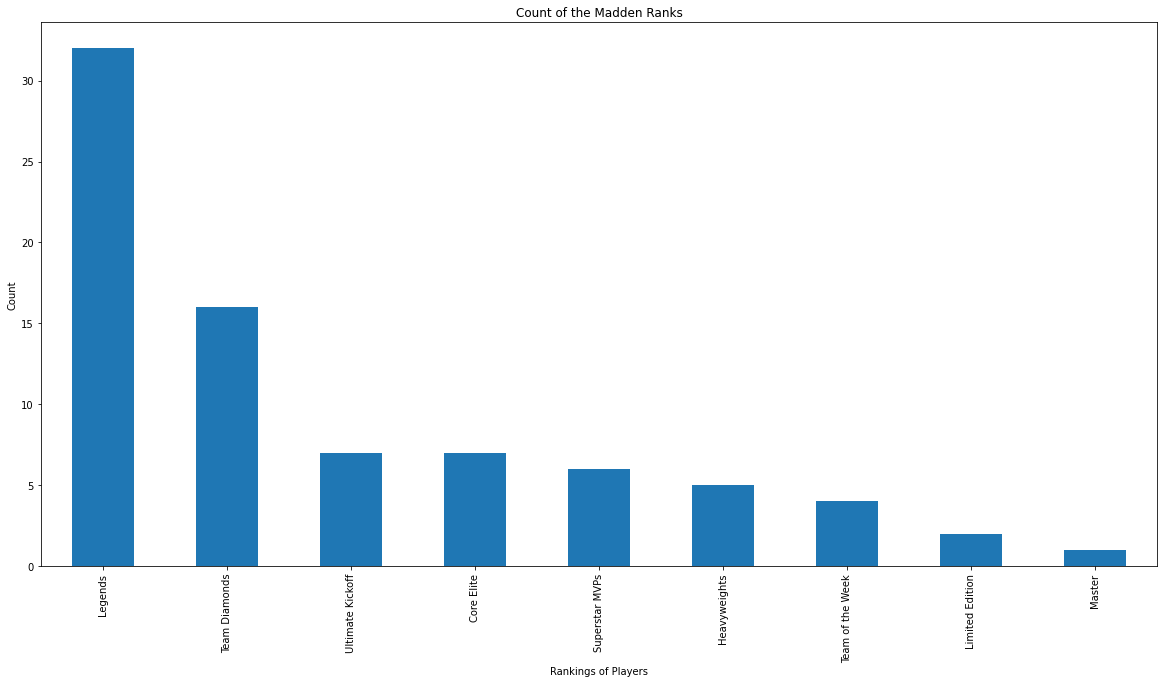

In [222]:
#Lets take a look at the rankings of the players

playerData.RANK.value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel('Rankings of Players')
plt.ylabel('Count')
plt.title('Count of the Madden Ranks')

print()
print()

playerData.RANK.value_counts()



HB      10
C       10
WR      10
TE       6
SS       6
RE       5
QB       5
RG       5
ROLB     4
DT       4
MLB      4
LT       3
RT       2
LOLB     2
FS       2
LG       1
K        1
Name: POSITION, dtype: int64

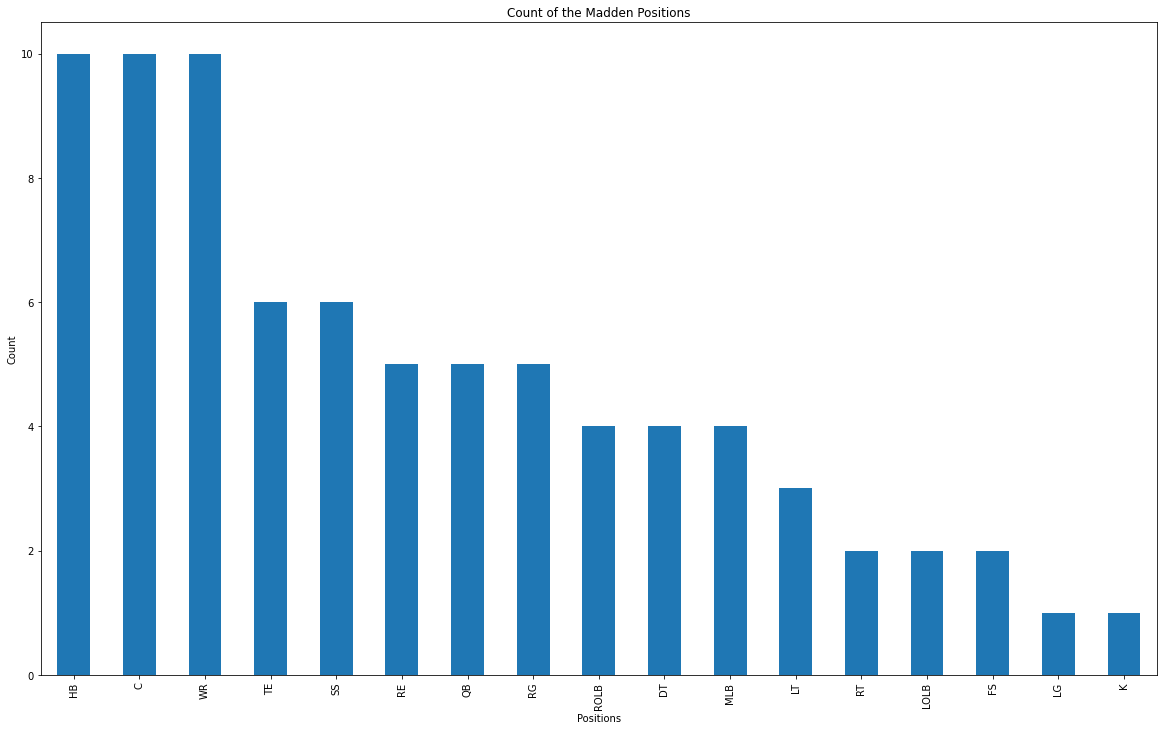

In [224]:
#Lets take a look at the count of the positions

playerData.POSITION.value_counts().plot(kind='bar', figsize=(20,12))
plt.xlabel('Positions')
plt.ylabel('Count')
plt.title('Count of the Madden Positions')


print()
print()


playerData.POSITION.value_counts()

#Here we see most of the top players in madden being halfbacks and wide receivers

#This is no surprise as optimizing a high value player in both of those positions
#leads to successful offenses

In [ ]:
#There could be more data scraped and added to this dataset for more insights
#This was a simple demonstration of scraping data from a website and doing data cleaning with some simple EDA